<a href="https://www.kaggle.com/code/ronaldopangarego/analisis-kesejahteraan-pekerja-indonesia?scriptVersionId=142316225" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **Konteks**
> Sebagai seseorang yang baru saja memasuki dunia kerja, mungkin kita semua akan mengalami kebingungan dimulai dari di daerah mana kita akan bekerja, berapa upah yang akan didapatkan, serta apakah pendapatan tersebut akan mencukupi untuk kebutuhan sehari-hari. Melalui beberapa data yang bersumber dari Badan Pusat Statistik (BPS), analisis ini mencoba membantu pekerja dalam memilih tempat bekerja berdasarkan beberapa variabel seperti pendapatan dan pengeluaran. Beberapa hal tersebut menjadikan analisis ini penting dan relevan sebab kondisi persaingan dunia kerja yang sangat ketat sehingga bagi pekerja tentu dibutuhkan perencanaan yang matang termasuk memikirkan kesejahteraannya berdasarkan pilihan-pilihan yang telah dibuat.
    
* upah.df.csv: dataset Rata-Rata Upah Pekerja Per Jam dengan disagregasi Provinsi dan Tahun
* ump.df.csv: dataset Upah Minimum Provinsi (UMP) dengan disagregasi Provinsi dan Tahun
* gk.df.csv: dataset **Garis Kemiskinan Per Kapita **dengan disagregasi Provinsi, Tahun, Periode Survei, Jenis Pengeluaran, dan Daerah Tempat Tinggal.
* peng.df.csv: dataset Rata-Rata Pengeluaran Per Kapita dengan disagregasi Provinsi, Tahun, Jenis Pengeluaran, dan Daerah Tempat Tinggal.


## **Pertanyaan**
* Bagaimana tren rata-rata upah pekerja per jam di berbagai provinsi selama beberapa tahun terakhir?
* Bagaimana perbandingan antara rata-rata upah pekerja per jam dan upah minimum provinsi di provinsi-provinsi tertentu?
* Apakah terdapat korelasi antara upah minimum provinsi (UMP) dengan rata-rata upah pekerja per jam?
* Bagaimana pengeluaran per kapita berkembang di berbagai provinsi dan jenis pengeluaran selama beberapa tahun terakhir?
* Apakah ada provinsi yang secara konsisten memiliki tingkat garis kemiskinan per kapita yang lebih tinggi atau lebih rendah daripada provinsi lainnya?
* Apakah ada hubungan antara tingkat pengeluaran per kapita dan tingkat kemiskinan per kapita di suatu daerah?
* Bagaimana perbandingan antara garis kemiskinan per kapita di berbagai provinsi, terutama dalam beberapa periode survei yang berbeda?
> ====
* Grafik Upah, UMP, Garis Kemiskinan, dan Pengeluaran tiap provinsi
* Provinsi dengan upah 5 tertinggi dan 5 terendah 
* Rata-rata upah vs ump perkotaan dan pedesaan
* Pendapatan Upah Per Jam vs UMP vs Pengeluaran 
* Pengeluaran vs Garis Kemiskinan
    

## **Import Libraries dan Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

gk = pd.read_csv('../input/pekerja-sejahtera/gk.df.csv')
upah = pd.read_csv('../input/pekerja-sejahtera/upah.df.csv')
pengeluaran = pd.read_csv('../input/pekerja-sejahtera/peng.df.csv')
ump = pd.read_csv('../input/pekerja-sejahtera/ump.df.csv')

## **Data Exploration**

In [2]:
# 5 baris pertama dataframe Garis Kemiskinan
gk.head()

,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0


In [3]:
# 5 baris pertama dataframe Upah per jam
upah.head()

,provinsi,tahun,upah
0,ACEH,2015,11226
1,ACEH,2016,13627
2,ACEH,2017,14809
3,ACEH,2018,13814
4,ACEH,2019,15065


In [4]:
# 5 baris pertama dataframe Pengeluaran
pengeluaran.head()

,provinsi,daerah,jenis,tahun,peng
0,ACEH,PERDESAAN,MAKANAN,2007,195176.0
1,ACEH,PERDESAAN,MAKANAN,2008,218781.0
2,ACEH,PERDESAAN,MAKANAN,2009,247427.0
3,ACEH,PERDESAAN,MAKANAN,2010,275749.0
4,ACEH,PERDESAAN,MAKANAN,2011,308000.0


In [5]:
# 5 baris pertama dataframe UMP
ump.head()

,provinsi,tahun,ump
0,ACEH,2002,330000.0
1,ACEH,2003,425000.0
2,ACEH,2004,550000.0
3,ACEH,2005,620000.0
4,ACEH,2006,820000.0


In [6]:
# DataFrame's shape
print("Garis Kemiskinan: %d baris and %d kolom" % gk.shape)
print("Upah Per Jam: %d baris and %d kolom" % upah.shape)
print("Pengeluaran: %d baris and %d kolom" % pengeluaran.shape)
print("UMP: %d baris and %d kolom" % ump.shape)

Garis Kemiskinan: 5460 baris and 6 kolom
Upah Per Jam: 280 baris and 3 kolom
Pengeluaran: 4620 baris and 5 kolom
UMP: 735 baris and 3 kolom


In [7]:
# nama kolom & tipe data DataFrame Garis Kemiskinan
print("Kolom Garis Kemiskinan: ")
print(gk.dtypes)

Kolom Garis Kemiskinan: 
provinsi     object
jenis        object
daerah       object
tahun         int64
periode      object
gk          float64
dtype: object


In [8]:
# nama kolom & tipe data DataFrame Upah per jam
print("Kolom Upah per jam: ")
print(upah.dtypes)

Kolom Upah per jam: 
provinsi    object
tahun        int64
upah         int64
dtype: object


In [9]:
# nama kolom & tipe data DataFrame Pengeluaran
print("Kolom Pengeluaran: ")
print(pengeluaran.dtypes)

Kolom Pengeluaran: 
provinsi     object
daerah       object
jenis        object
tahun         int64
peng        float64
dtype: object


In [10]:
# nama kolom & tipe data DataFrame UMP
print("Kolom UMP: ")
print(ump.dtypes)

Kolom UMP: 
provinsi     object
tahun         int64
ump         float64
dtype: object


In [11]:
# Cek missing values Garis Kemiskinan
gk_mean_value = gk['gk'].mean()
gk['gk'].fillna(value=gk_mean_value, inplace=True)
print(gk.isnull().sum())

provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
dtype: int64


In [12]:
# Cek missing values Upah per jam
print(upah.isnull().sum())

provinsi    0
tahun       0
upah        0
dtype: int64


In [13]:
# Cek missing values Pengeluaran
peng_mean_value = pengeluaran['peng'].mean()
pengeluaran['peng'].fillna(value=peng_mean_value, inplace=True)
print(pengeluaran.isnull().sum())

provinsi    0
daerah      0
jenis       0
tahun       0
peng        0
dtype: int64


In [14]:
# Cek missing values UMP
ump_mean_value = ump['ump'].mean()
ump['ump'].fillna(value=ump_mean_value, inplace=True)
print(ump.isnull().sum())

provinsi    0
tahun       0
ump         0
dtype: int64


In [15]:
# Dataset Statistical Summary: Garis Kemiskinan
gk.describe()

,tahun,gk
count,5460.000000,5460.000000
mean,2018.115385,303904.185516
std,2.577159,155266.220703
min,2013.000000,48561.000000
25%,2016.000000,149278.000000
50%,2018.000000,305580.000000
75%,2020.000000,405551.250000
max,2022.000000,872843.000000


In [16]:
# Dataset Statistical Summary: Upah per jam
upah.describe()

,tahun,upah
count,280.00000,280.000000
mean,2018.50000,16621.010714
std,2.29539,4371.803056
min,2015.00000,8525.000000
25%,2016.75000,13468.750000
50%,2018.50000,15845.000000
75%,2020.25000,18634.750000
max,2022.00000,32685.000000


In [17]:
# Dataset Statistical Summary: Pengeluaran
pengeluaran.describe()

,tahun,peng
count,4620.000000,4.620000e+03
mean,2015.045455,6.012012e+05
std,4.416124,3.482609e+05
min,2007.000000,5.921600e+04
25%,2011.750000,3.528985e+05
50%,2015.000000,5.307305e+05
75%,2019.000000,7.527372e+05
max,2022.000000,2.525347e+06


In [18]:
# Dataset Statistical Summary: UMP
ump.describe()

,tahun,ump
count,735.000000,7.350000e+02
mean,2012.000000,1.402290e+06
std,6.059424,8.618174e+05
min,2002.000000,2.450000e+05
25%,2007.000000,6.741000e+05
50%,2012.000000,1.180000e+06
75%,2017.000000,2.035000e+06
max,2022.000000,4.641854e+06


## **Analysis & Visualizations**

#### **Provinsi dengan upah 5 tertinggi dan 5 terendah tahun 2022**

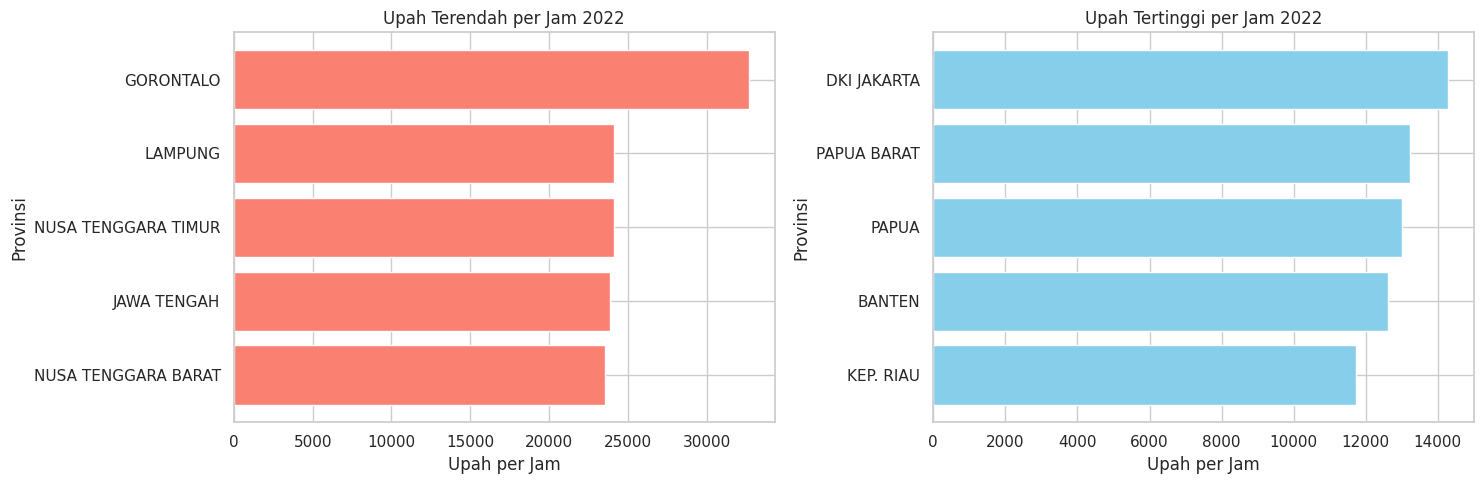

In [19]:
upah_2022 = upah[upah['tahun']==2022].copy()
upah_sorted = upah_2022.sort_values(by='upah', ascending=True)
# upah_sorted
upah_tertinggi = upah_sorted[:5]
upah_terendah = upah_sorted[-5:]

# print(upah_tertinggi)
# print(upah_terendah)

plt.figure(figsize=(15, 5))

# Bar plot untuk upah terendah
plt.subplot(1, 2, 1)
plt.barh(upah_tertinggi['provinsi'], upah_terendah['upah'], color='salmon')
plt.title('Upah Terendah per Jam 2022')
plt.xlabel('Upah per Jam')
plt.ylabel('Provinsi')

# Bar plot untuk upah tertinggi
plt.subplot(1, 2, 2)
plt.barh(upah_terendah['provinsi'], upah_tertinggi['upah'], color='skyblue')
plt.title('Upah Tertinggi per Jam 2022')
plt.xlabel('Upah per Jam')
plt.ylabel('Provinsi')

plt.tight_layout()
plt.show()

#### **UMP di 5 upah tertinggi dan 5 upah terendah**

    provinsi  tahun        ump
147  LAMPUNG   2002   310000.0
148  LAMPUNG   2003   350000.0
149  LAMPUNG   2004   377500.0
150  LAMPUNG   2005   405000.0
151  LAMPUNG   2006   505000.0
..       ...    ...        ...
709    PAPUA   2018  3000000.0
710    PAPUA   2019  3240900.0
711    PAPUA   2020  3516700.0
712    PAPUA   2021  3516700.0
713    PAPUA   2022  3561932.0

[189 rows x 3 columns]


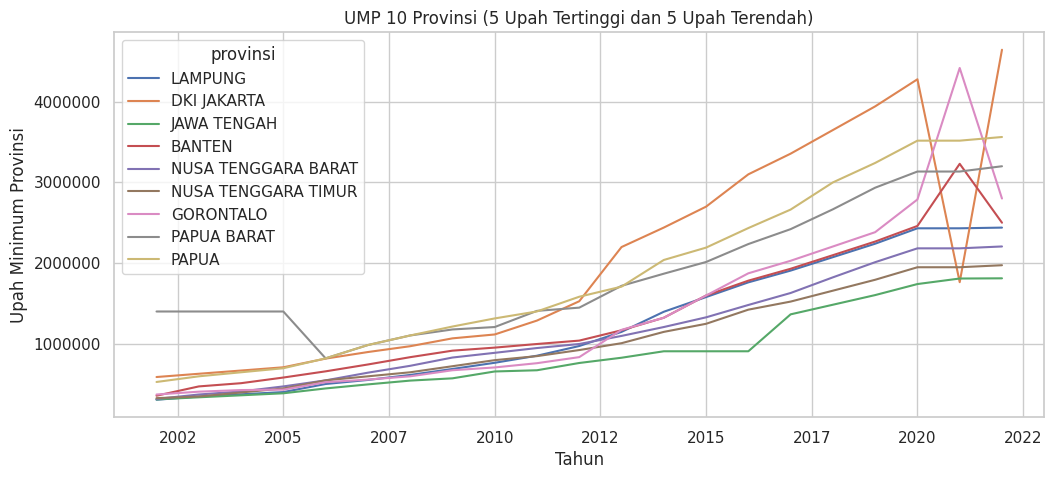

In [20]:
provinsi = ['DKI JAKARTA','PAPUA BARAT','PAPUA','BANTEN','KEP.RIAU','GORONTALO','LAMPUNG','NUSA TENGGARA TIMUR','JAWA TENGAH','NUSA TENGGARA BARAT']
ump_filtered = ump[ump['provinsi'].isin(provinsi)]
print(ump_filtered)

# line chart UMP dengan upah provinsi 5 tertinggi dan 5 terendah tahun 2022
plt.figure(figsize=(12,5))
sns.lineplot(x="tahun", y="ump", data=ump_filtered, hue='provinsi')
plt.title('UMP 10 Provinsi (5 Upah Tertinggi dan 5 Upah Terendah)')
plt.xlabel('Tahun')
plt.ylabel('Upah Minimum Provinsi')

# Mengatur format label tahun
ax = plt.gca()
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)  # Menonaktifkan notasi ilmiah
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))  # Format tahun tanpa desimal

plt.grid(True)
plt.show()

#### **Bagaimana tren rata-rata upah pekerja per jam?**

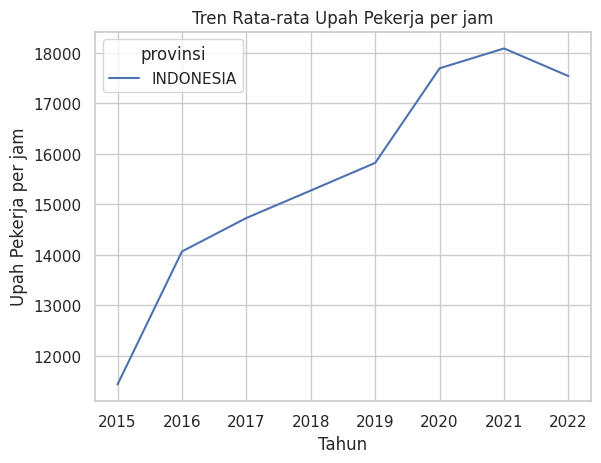

In [21]:
upah_provinsi = upah[(upah['provinsi'] == 'INDONESIA') ]

# line chart upah provinsi 
sns.lineplot(x="tahun", y="upah", data=upah_provinsi, hue='provinsi')
plt.title('Tren Rata-rata Upah Pekerja per jam')
plt.xlabel('Tahun')
plt.ylabel('Upah Pekerja per jam')

# Mengatur format label tahun 
ax = plt.gca()
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)  # Menonaktifkan notasi ilmiah
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))  # Format tahun tanpa desimal

plt.show()

#### **Apakah ada hubungan antara tingkat pengeluaran per kapita dan tingkat kemiskinan per kapita di suatu daerah?**

In [22]:
# Hitung korelasi Pearson
correlation = pengeluaran['peng'].corr(gk['gk'])
correlation

-0.005405587617440392

#### **Apakah terdapat korelasi antara upah minimum provinsi (UMP) dengan rata-rata upah pekerja per jam?**

In [23]:
# Hitung korelasi Pearson
correlation = ump['ump'].corr(upah['upah'])
correlation

-0.01245972497987201

## **Kesimpulan**

**1. Provinsi dengan upah 5 tertinggi dan 5 terendah**
>  * Provinsi DKI Jakarta memiliki upah per jam tertinggi pada tahun 2022, dengan jumlah sebesar 32.685 rupiah.
>  * Provinsi-provinsi seperti DKI Jakarta, Papua, Papua Barat, Banten, dan Kepulauan Riau memiliki upah pekerja per jam yang jauh lebih tinggi dibandingkan dengan provinsi-provinsi lainnya. Ini mungkin terkait dengan tingkat biaya hidup yang lebih tinggi di wilayah-wilayah ini.
>  * Provinsi-provinsi seperti Nusa Tenggara Barat, Jawa Tengah, Nusa Tenggara Timur, Lampung, dan Gorontalo memiliki upah pekerja per jam yang relatif lebih rendah dibandingkan dengan provinsi-provinsi yang disebutkan di atas.


**2. UMP di 5 upah tertinggi dan 5 upah terendah**
>  * UMP di 10 provinsi mengalami peningkatan yang signifikan dari tahun ke tahun. 
>  * Terdapat penurunan signifikan dalam UMP di DKI Jakarta pada tahun 2021, yang kemungkinan terkait dengan dampak pandemi COVID-19. Namun, pada tahun 2022, UMP kembali meningkat secara drastis.

**3. Bagaimana tren rata-rata upah pekerja per jam di berbagai provinsi selama beberapa tahun terakhir?**
> Berdasarkan grafik yang terlihat diatas dapat disimpulkan bahwa setiap tahunnya upah diberbagai provinsi di Indonesia terus mengalami kenaikan yang signifikan. Terdapat penurunan ditahun 2021-2022, yang kemungkinan dikarenakan efek dari pandemi COVID-19.

**4. Apakah ada hubungan antara tingkat pengeluaran per kapita dan tingkat kemiskinan per kapita di suatu daerah?**
> Hasil perhitungan korelasi sebesar -0.005762067797462299 mengindikasikan bahwa terdapat hubungan yang sangat lemah atau bisa dikatakan tidak ada hubungan linear antara tingkat pengeluaran per kapita dan tingkat kemiskinan per kapita di suatu daerah.

**5. Apakah terdapat korelasi antara upah minimum provinsi (UMP) dengan rata-rata upah pekerja per jam?**
> Hasil perhitungan korelasi sebesar -0.012888932443995662 mengindikasikan bahwa terdapat hubungan yang sangat lemah atau bisa dikatakan tidak ada hubungan linear antara Upah Minimum Provinsi (UMP) dan rata-rata upah pekerja per jam.